輸入你要預測的天數 30
以下是預測 30 天的病例數
[38262, 39284, 41431, 44529, 45209, 50050, 44245, 45216, 45089, 46263, 48896, 41637, 43567, 48483, 51709, 52849, 52002, 50117, 52399, 53464, 52458, 51601, 43977, 44582, 42912, 48777, 51910, 53468, 46186, 39626]


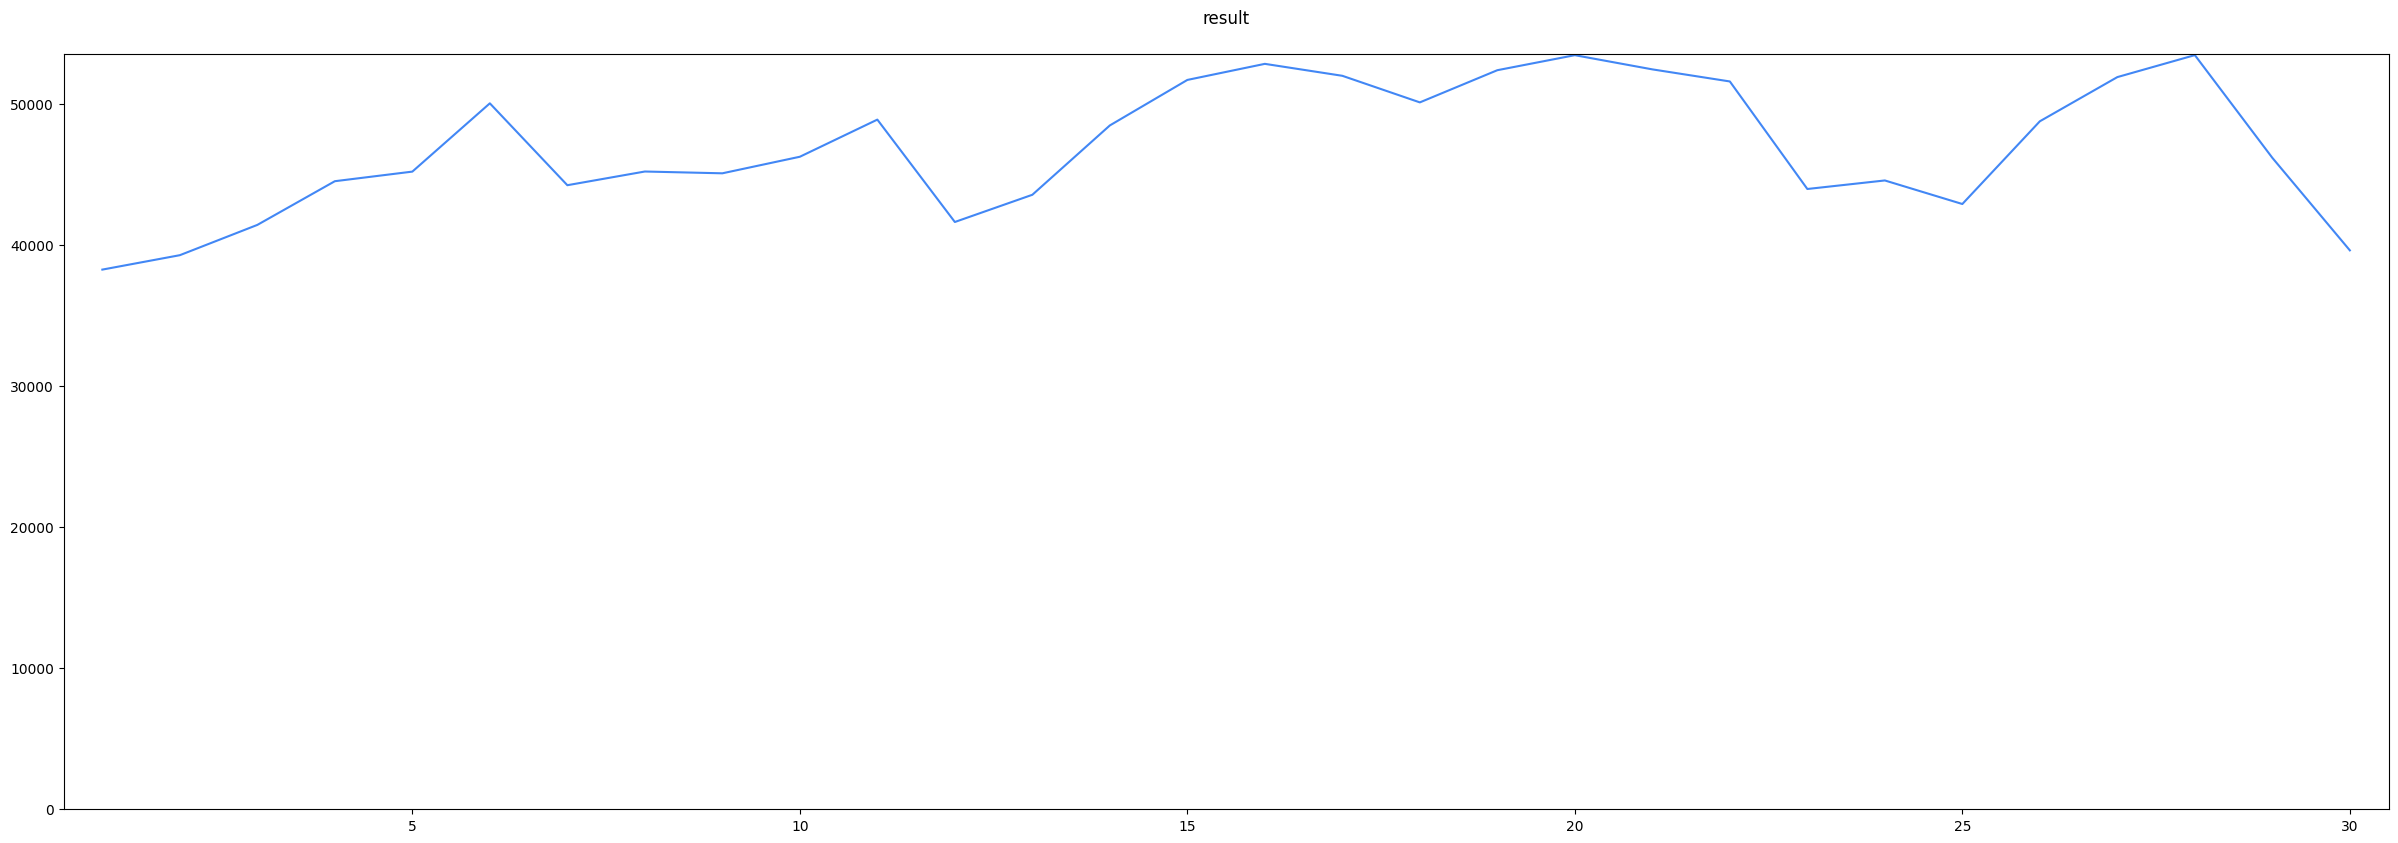

In [ ]:
import random
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length "{length}" bytes'.format(name=fn, length=len(uploaded[fn])))

import pandas as pd
sheet = pd.read_excel(fn)
def case_model(day):
  peep=[] #人數
  pect=[] #病例成長率
  pect_r=0
  max = 0 #病例成長率極大值
  days = []
  for t in range(0,day):
    days.append(t+1) 
  for b in range(0,day):
    pt = (sheet['每日新增病例數'][b]-sheet['每日新增病例數'][b+1])/sheet['每日新增病例數'][b+1] #算出病例成長率(30天)
    pect.append(round(pt*100,1))
  for i in range(0,day):
      peep.append(sheet['每日新增病例數'][i])
  for com1 in range(0,day): #算出病例極大值
    if peep[com1] > max:
      max = peep[com1]
  min = peep[0] #病例成長率極小值
  for com2 in range(0,day):
    if peep[com2] < min:
      min = peep[com2] #算出病例極小值
  for k in range(0,day-1):
    pect_r = pect_r + (round(abs(pect[k]-pect[k+1]),1))
  pect_r = round(pect_r/(k-1),1)
  firnum=peep[0]
  firper=pect[0]
  new = []
  count = 0
  while count <= day-1:
    newpp = (1+(random.uniform(-pect_r,pect_r)/100))
    newp = int(firnum*newpp) #預測未來病例數(範圍在max到min間(大約0.85~1.15左右),再將最新一期的病例數乘上成長率)
    if newp >= min and newp <= max:
      new.append(round(newp,0))
      count = count + 1
      firnum = newp
  print("以下是預測",day,"天的病例數")
  print(new)
  plt.figure(figsize=(30,10),dpi=100,linewidth=10)
  plt.plot(days,new,color='#4287f5',label='eng')
  plt.title("result",x=0.5,y=1.03)
  plt.xlim([0.5,day+0.5])
  plt.ylim([0,max])
x = int(input("輸入你要預測的天數 "))
case_model(x)